# Project Proposal

- Flow-Chart

## Raw Data

In [4]:
import pandas as pd
data = pd.read_csv('./nlp-getting-started/train.csv')
data.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Analysis
- there are 7613 data points
- 0.80% of the data has missing entries on the keyword column.
- **33.27%** of the data has missing entires on the location column.
- Data is ordered in terms of keyword used to extact the tweet from twitter -> shuffle the data for training. 
- The **#** symbol is a comment when data is stored on a numpy array hence remove all # symbols.
- The **,** symbol is a column delimeter, hence remove it from the location and text columns.

### Decisions 

- The most important columns are the text and target columns
- Missing values on the keyword column can be discarded since the keywords appears within the tweet text itself.
- The location column can not be discarded because only 66.73% have a location value associated with them. Droping 33% of the data is impractical
- It is however worth exploring whether location of tweet has an impact on the real or fake status of a tweet
- e.g. In some locations such as a city centre there cannot be a veld fire - so that is a consideration to be made

## Data Processing

- Data has to be transformed into features to act as inputs for machine learning model in Tensorflow.
- Tweets can be represented using vectors(tensors).
- The popular feature representation techniques:
            - One-Hot Encoding
            - TF-IDF
            - Word Embedding
         
__1. One-Hot Encoding__

- Tockenize all words in text.
- Create a dictionary of size=**n**.
- {key:value} where key=word and value=integer number representation
- Individual words are then represented using vectors of size **n**.
- Each vector has a single entry that is set to 1 while the others are set to 0.
- Example:
       
       Tockenized words:
       ['complex', 'is', 'better', 'than', 'complicated', 'flat', 'is', 'better', 'than', 'nested']
        
       Dictionary: 
        {
          'complex': 0,
          'is': 1,
          'better': 2,
          'than': 3,
          'complicated': 4,
          'flat': 5,
          'nested': 6,
        }

        One-hot encoding:
        [
          [1, 0, 0, 0, 0, 0, 0], #complex 
          [0, 1, 0, 0, 0, 0, 0], #is 
          [0, 0, 1, 0, 0, 0, 0], #better 
          [0, 0, 0, 1, 0, 0, 0], #than 
          [0, 0, 0, 0, 1, 0, 0], #complicated 
        ]

__2. TF-IDF__

- TF-IDF is a score that represents the relative importance of a term in the document and the entire corpus
 
__3. Word Embedding__

- Words are represented using feature vectors.
- Example: 
    - Rows are features
    - Columns are words

|   | He  | is  | a  | good  |  boy |
|---|---|---|---|---|---|
| gender  | 1.2  | 0.3  | 0.01  | 0.002  | 1.3  |
|  character | 0.01  | 0.03  |  0.0003 |  1.2 |0.01   |
|  . | .  |  . |  . | .  | .  |
|  . |  . |  . | .  | .  | .  |
|  . | .  |  . | .  | .  |.   |
|  n |  . |  . |  . | .  | .  |

- Common techniques in Python are:
    1. Word2Vec: CBOW and SkipGram
    2. Embedding layer on Keras
    3. Glove

## Machine Learning Model

### Learning

- Input will be batched.
- Batching allows for multiple CPU cores to train on the data concurrently.
- Stochastic Gradient Descent also allows for weights to be updated after training on a single batch is completed as opposed to at the end of an epoch.
- The machine learning model contains sevaral parameters and hyper-parameters:

| Hyper-Parameters  | Parameter  | 
|---|---|
| Set by user  | Updated automatically during training  |  
|  Number of hidden layers | Weights  | 
| Width of hidden layers | Bias |  
| Learning rate  |   |  

**Training**

- When training the aim is to minimise a loss/cost function.
- For classification tasks the common loss function is the cross-entropy loss function: <br/>
$L(w,b) = \sum t_{i} log y_i$
- where $t_i$ is the target and $y_i$ is the obtained output
- To minimize this cost function an optimization algorithm is used.
- A common optimization algorithm is Gradient Descent: $ x_{i+1} = x_{i} - \eta \cdot f'(x)$
- In gradient descent an initial value of x is chosen. 
- The initial value is then used to calculate the next value.
- The difference between the value of x at i and i+1 is evaluated.
- When this difference is small it indicates that the minimum has been reached or that we are close to the minimum.
- When there are multiple minima, gradient descent is likely to classify a local minima as the global minima.
- To solve this, the learning rate should be carefully chosen.

**Gradient Descent Illustration**


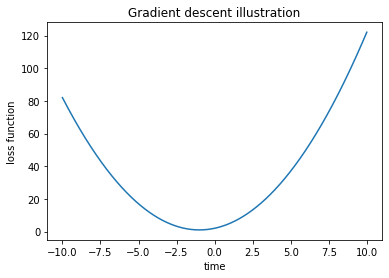

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# create 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, 1000)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 2  

fig, ax = plt.subplots()
ax.set_title('Gradient descent illustration')
ax.set_xlabel('time')
ax.set_ylabel('loss function')
ax.plot(x, y) 

**Learning rate** - determines how large the steps taken while in descent are.(the rate at which the ML algorithm forgets old beliefs for new ones).
- If too large it will oscillate around the minimum altogether
- If too small too many iterations will be needing which would take impractical amounts of time to finish
- The inability of GD to detect can be overcome by taking into consideration the momentum.
- Learning rate schedules can be used to find the optimal learning rate
- Some learning rate schedules include AdaGrad, RMSprop and Adam. For this project Adam(Adaptive moment estimation) will be used.

**Back Propagation**
- The weights and biases are randomly initialized.
- Forward propagation is performed and the loss at the end is computed.
- The weights and biases are updated by a fraction of the differential of the loss function.
- The process is repeated until a min loss function is obtained.

### Validation.

- The validation data is used to detect over-fitting.
- The training data will be split into a training set, validation set and testing set.
- The split ratio is 80:10:10
- At the end of an epoch a forward pass is performed on the validation data set and the loss function of that data is calculated.
- This is called the validation loss.
- The validation loss is expected to be close to the training loss. 
- The validation loss is expected to decrease with the training loss.
- Once the validation loss starts increasing, it indicates that the model is over-fitting.
- No backward propagation is performed on the validation data since this would defeat the purpose of detecting over-fitting.
- Early stopping can be used to stop training once the validation loss starts increasing.

### Testing

- Once the model has been trained and validated. The testing data will be input into the model and the error of the model will be obtained.
- The initial target accuracy for this project is 80%.

### Machine Learning Model Architectures.

1. **Multi-Layer perceptron**
    - The most basic NN architechure. 
    - Evaluates input at each node independently.
    
2. **Recurrent Neural Network**
    - The multilayer perceptron does not model relationships between different words in a sentence sequence.
    - RNNs solve this by considering the hidden state from previous layers at the current layer.
    - The hidden state and current input are used to compute the hidden state of the current layer.
    - This means the relationship between sequential words is captured.
3. **Long short-term memory (LSTM)** 
    - RNNs suffer from a vanishing gradient.
    - This means that the gradient shrinks as it propagates through time.
    - This leads to ealier layers getting small gradient updates
    - Hence RNNs tend to forget what they have seen in ealier sequences.
    - LSTMs have gates which regulate the flow of information.
    - The gates learn which information in a sequence is important to keep and which information to forget.
